#Cover Page

**Developed by:**

**Mohamed Fathi - 41810059**

**Ahmed Saber - 41810077**

#Import the dataset from drive

In [ ]:
!gdown --id 1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld

Downloading...
From: https://drive.google.com/uc?id=1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld
To: /content/seeds.csv
100% 9.12k/9.12k [00:00<00:00, 7.87MB/s]


#Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# show how the data looks like

In [ ]:
data = pd.read_csv('seeds.csv')
data.head(5)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#Normalization

In [ ]:
df = data.drop('Type', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, data.Type), 1)
df_norm.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.192837,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.033497,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.256149,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.197870,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.078133,0.322994,1


#Start Split the data and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop('Type', axis=1), df_norm['Type'], test_size = 0.20)
print(len(X_train), "train +", len(X_test), "valid")

159 train + 40 valid


#Using Random_Forest for trainning 

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 12]])

Text(33.0, 0.5, 'Truth')

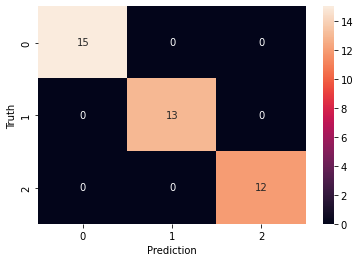

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Accuracy** 

In [ ]:
var="%"
print("Accuracy: %0.1f" % (model.score(X_test,y_test)*100), var[0])

Accuracy: 100.0 %


#find the mean square error

In [ ]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [ ]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.0